<a href="https://colab.research.google.com/github/fmezacr/machinelearning/blob/main/Dise%C3%B1o_de_Redes_Neuronales_ANN_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

<div style="font-size:small;">

MIT License

Copyright (c) [2024] Felipe Meza-Obando

*Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software for educational purposes only. You must give author appropriate credit, provide a link to the license and source, and indicate if changes were made.*
</div>

---


## **Tutorial: Diseño y Operación de Redes Neuronales con Keras**
### Autor: ***Felipe Meza-Obando***

### **1. Introducción**
En este tutorial exploraremos el proceso completo para diseñar, entrenar y validar una red neuronal utilizando el conjunto de datos MNIST. El objetivo es comprender cómo funcionan las arquitecturas básicas de redes neuronales, la importancia de los hiperparámetros y cómo interpretar los resultados de entrenamiento.

Empezaremos con un caso de clasificación y cerraremos con uno de regresión.

---

### **2. Carga de Librerías y Conjunto de Datos**

In [80]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from IPython.display import Image
import time
plt.style.use("seaborn-v0_8-paper")



- **`mnist`**: Base de datos de imágenes de dígitos escritos a mano.  
- **`Sequential`**: Permite crear una red capa por capa.  
- **`Dense`**: Capa completamente conectada.  
- **`Dropout`**: Técnica para reducir el overfitting.  
- **`to_categorical`**: Convierte las etiquetas en vectores categóricos para clasificación multiclase.

---

### **3. Cargar y Visualizar los Datos**

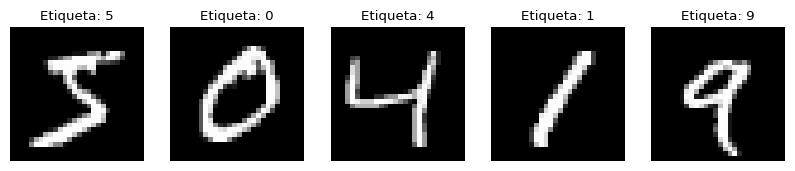

In [81]:
# Cargar el dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Visualizar algunas imágenes
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i in range(5):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Etiqueta: {y_train[i]}")
plt.show()

In [82]:
X_test.shape

(10000, 28, 28)


- El dataset MNIST contiene **60,000 imágenes** para entrenamiento y **10,000 imágenes** para prueba.  
- Cada imagen es de tamaño **28x28 píxeles** y representa un dígito entre 0 y 9.

---



### **4. Preprocesamiento de Datos**

In [83]:
# Normalización: Escalar los valores de píxeles entre 0 y 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Convertir etiquetas a formato categórico
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

  
- **Normalización:** Mejora la convergencia del modelo.  
- **Aplanado:** La capa densa espera vectores como entrada, no matrices 2D.  
- **Categorización:** Cada etiqueta se convierte en un vector binario para la clasificación.

---



### **5. Definir la Arquitectura de la Red**

In [84]:
model = Sequential([
    tf.keras.Input(shape=(28, 28)),  # Definimos la entrada explícitamente
    Flatten(),                       # Aplanamiento
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


# Resumen del modelo
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


- **Entrada:** Vector de 784 dimensiones (imágenes aplanadas).  
- **Primera capa oculta:** 128 neuronas, activación ReLU, con **Dropout** del 20%.  
- **Segunda capa oculta:** 64 neuronas, activación ReLU.  
- **Capa de salida:** 10 neuronas (una por clase), activación **softmax** para clasificación multiclase.



In [85]:
# Mostrar la imagen usando IPython
Image(url='https://3b1b-posts.us-east-1.linodeobjects.com/content/lessons/2017/gradient-descent/recap-propagation.png', width=600)


---

### **6. Compilar el Modelo**

In [86]:
model.compile(optimizer='adam',                #El valor predeterminado del learning rate en Adam es 0.001.
              loss='categorical_crossentropy',
              metrics=['accuracy'])


- **`adam`**: Optimizador que ajusta el learning rate automáticamente.  
- **`categorical_crossentropy`**: Función de pérdida para clasificación multiclase.  
- **`accuracy`**: Métrica utilizada para evaluar el rendimiento del modelo.

---

### **7. Entrenamiento del Modelo**

Usamos los datos de prueba para evaluar la precisión final del modelo.

In [87]:
# Iniciar el timer
start_time = time.time()

# Entrenar el modelo con los datos aplanados
history = model.fit(X_train, y_train,
                    validation_split=0.2, # De los datos de training, se toma el 20% para validar.
                    epochs=10,
                    batch_size=32)

# Calcular el tiempo total de entrenamiento
end_time = time.time()
elapsed_time = end_time - start_time

# Imprimir el tiempo total en segundos
print(f"Tiempo total de entrenamiento: {elapsed_time:.2f} segundos")



Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8465 - loss: 0.5154 - val_accuracy: 0.9557 - val_loss: 0.1505
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9537 - loss: 0.1532 - val_accuracy: 0.9673 - val_loss: 0.1057
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9638 - loss: 0.1146 - val_accuracy: 0.9674 - val_loss: 0.1015
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9705 - loss: 0.0923 - val_accuracy: 0.9722 - val_loss: 0.0972
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9747 - loss: 0.0772 - val_accuracy: 0.9743 - val_loss: 0.0909
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9770 - loss: 0.0711 - val_accuracy: 0.9753 - val_loss: 0.0906
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9791 - loss: 0.0650 - val_accuracy: 0.9755 - val_loss: 0.0856
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9814 - loss: 0.0578

- **`epoch`**: Una pasada completa por el conjunto de entrenamiento.  
- **`batch_size`**: Número de muestras procesadas antes de actualizar los pesos.  
- **`validation_split`**: Porcentaje de datos reservados para validación durante el entrenamiento.

---



### **8. Visualización de las Curvas de Entrenamiento**

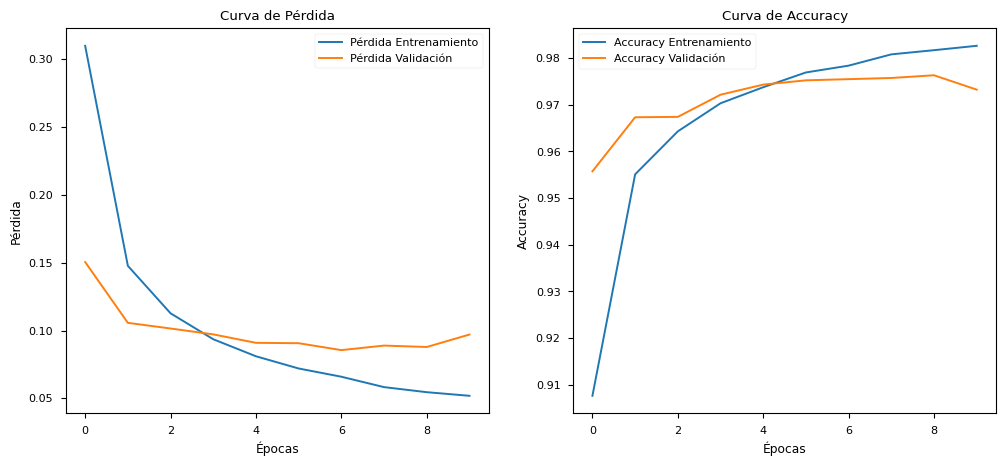

In [88]:
# Graficar las curvas de pérdida y accuracy
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Curva de pérdida
ax[0].plot(history.history['loss'], label='Pérdida Entrenamiento')
ax[0].plot(history.history['val_loss'], label='Pérdida Validación')
ax[0].set_title('Curva de Pérdida')
ax[0].set_xlabel('Épocas')
ax[0].set_ylabel('Pérdida')
ax[0].legend()

# Curva de accuracy
ax[1].plot(history.history['accuracy'], label='Accuracy Entrenamiento')
ax[1].plot(history.history['val_accuracy'], label='Accuracy Validación')
ax[1].set_title('Curva de Accuracy')
ax[1].set_xlabel('Épocas')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()


### **9. Evaluación del Modelo**

In [89]:

# Evaluar el modelo con el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss * 100:.2f}%")
print(f"Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9718 - loss: 0.0977
Test Loss: 8.68%
Precisión en el conjunto de prueba: 97.50%


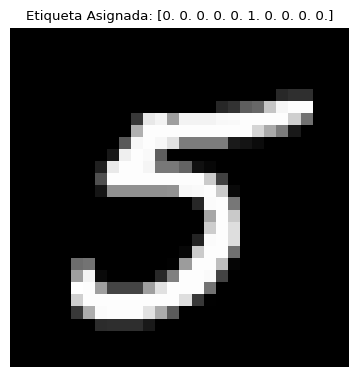

In [90]:
# Seleccionar un índice aleatorio para visualizar un dígito
index = np.random.randint(0, len(X_test))

# Visualizar la imagen y su etiqueta correspondiente
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.title(f'Etiqueta Asignada: {y_test[index]}')
plt.axis('off')  # Eliminar ejes para una mejor visualización
plt.show()


### **8. Visualización de las Curvas de Entrenamiento**


- El modelo se evalúa utilizando los datos de prueba para verificar su rendimiento.  
- El **accuracy** en los datos de prueba indica qué tan bien generaliza el modelo.

---

### **10. Técnicas para Evitar Overfitting**

- **Dropout:** Apaga aleatoriamente neuronas durante el entrenamiento.  
- **Early Stopping:** Detiene el entrenamiento si la pérdida de validación deja de mejorar.  

---

### **11. Sugerencias de Mejora**

- Se podría mejorar el rendimiento ajustando hiperparámetros como el learning rate (cuando sea posible), el número de épocas o el tamaño del batch.
- Si el modelo tiene alta precisión en entrenamiento pero baja en validación, se podría aumentar el Dropout o utilizar Early Stopping.
- Aumentar la cantidad de neuronas o capas ocultas.
- Usar regularización adicional o técnicas más avanzadas como batch normalization.

---



# **Algunos otros conceptos...**

### **Funciones de pérdida (loss) en redes neuronales**

Las funciones de **pérdida (loss)** son esenciales en la construcción y entrenamiento de modelos de **aprendizaje profundo**. Estas funciones miden qué tan bien el modelo está haciendo predicciones comparadas con las etiquetas verdaderas. En esencia, indican **qué tan lejos** están las predicciones del modelo de los valores correctos. Durante el entrenamiento, los optimizadores ajustan los pesos del modelo con el objetivo de minimizar esta pérdida.

---

## **Funciones de pérdida más utilizadas**
### **1. Sparse Categorical Crossentropy**
- **Uso**: Para **problemas de clasificación multiclase** donde cada muestra pertenece a una clase entre varias.
- **Ejemplo**: Clasificación de dígitos (como en MNIST, con 10 clases).
- **Ecuación**:
$$
  L = - \frac{1}{N} \sum_{i=1}^{N} \log(p_i)
$$
  Donde $p_i$ es la probabilidad predicha para la clase correcta.
- **Cuándo usar**: Cuando las etiquetas están en **formato de enteros** (por ejemplo, [0, 1, 2, ..., 9]).

**Código ejemplo**:
```python
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
```

### **2. Categorical Crossentropy**
- **Uso**: También para **problemas multiclase**, pero cuando las etiquetas están **one-hot encoded** (es decir, en formato de vectores binarios, como `[0, 1, 0, ..., 0]`).
- **Ecuación**: Similar a `sparse_categorical_crossentropy`.
- **Cuándo usar**: Si se están utilizando etiquetas **one-hot encoded** en lugar de enteros.

**Diferencia clave con `sparse_categorical_crossentropy`**:
- **Sparse** espera etiquetas enteras (ej.: 0, 1, 2).
- **Categorical** espera etiquetas **one-hot** (ej.: `[0, 1, 0, 0, ..., 0]`).

---

### **3. Binary Crossentropy**
- **Uso**: Para **clasificación binaria** (por ejemplo, clasificación de si un correo es spam o no).
- **Ecuación**:
  $$
  L = - \frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
  $$
  Donde $y_i$ es la etiqueta real (0 o 1) y $\hat{y}_i$ es la probabilidad predicha.

- **Cuándo usar**: Cuando el objetivo es **clasificación binaria**.

**Código ejemplo**:
```python
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
```

---

### **4. Mean Squared Error (MSE)**
- **Uso**: Para **problemas de regresión**, donde el objetivo es predecir valores continuos (como precios de casas).
- **Ecuación**:
  $$
  MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
  $$
  Donde $y_i$ es el valor real y $\hat{y}_i$ es el valor predicho.

- **Interpretación**: Penaliza los errores más grandes de forma más severa, lo que lo hace sensible a outliers.
- **Cuándo usar**: En **regresión**, donde el modelo predice valores numéricos continuos.

**Código ejemplo**:
```python
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])
```

---

### **5. Mean Absolute Error (MAE)**
- **Uso**: Para **regresión**, mide el promedio del error absoluto entre las predicciones y los valores reales.
- **Ecuación**:
  $$
  MAE = \frac{1}{N} \sum_{i=1}^{N} |y_i - \hat{y}_i|
  $$
- **Interpretación**: Menos sensible a los outliers que el MSE.
- **Cuándo usar**: En regresiones donde se busca minimizar el error absoluto medio.

**Código ejemplo**:
```python
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mae'])
```

---

### **6. Huber Loss**
- **Uso**: Una combinación entre **MSE** y **MAE**, para manejar outliers de forma más robusta.
- **Ecuación**:
  $$
  L_{\delta}(a) = \begin{cases}
  \frac{1}{2} (a)^2 & \text{para } |a| \leq \delta \\
  \delta \cdot (|a| - \frac{1}{2} \delta) & \text{para } |a| > \delta
  \end{cases}
  $$
- **Cuándo usar**: En problemas de **regresión** con outliers.

---

## **Selección de la función de pérdida adecuada**
- **Clasificación binaria**: `binary_crossentropy`
- **Clasificación multiclase (etiquetas enteras)**: `sparse_categorical_crossentropy`
- **Clasificación multiclase (one-hot encoded)**: `categorical_crossentropy`
- **Regresión (valores continuos)**: `mean_squared_error` o `mean_absolute_error`
- **Regresión con outliers**: `huber_loss`

---

Cada función de pérdida está diseñada para **minimizar diferentes tipos de errores**. Seleccionar la pérdida adecuada garantiza que el modelo aprenda de manera eficiente para el problema específico. Es importante experimentar con las funciones para ver cuál se adapta mejor al conjunto de datos y al problema que estamos resolviendo.

---


## **¿Por qué a veces usamos 3 datasets?**

Al entrenar un modelo de Machine Learning, es fundamental dividir los datos en **tres conjuntos**: **entrenamiento (Training Set)**, **validación (Validation Set)** y **prueba (Test Set)**. Cada uno cumple una función específica en el proceso de desarrollo del modelo para asegurar un rendimiento óptimo y evitar problemas como el **overfitting** (sobreajuste). A continuación, explicamos la importancia de cada uno.

---

### **1. Conjunto de Entrenamiento (Training Set)**
- **Función:** Se utiliza para **ajustar los pesos y parámetros del modelo**. Aquí es donde el modelo "aprende" a reconocer patrones en los datos de entrada.
- **Propósito:** Permitir que el modelo encuentre relaciones entre los datos de entrada y los resultados esperados.
- **Riesgo:** Si solo se usa este conjunto, el modelo puede memorizar los datos en lugar de generalizar, provocando **sobreajuste**.
- **Tamaño:** Generalmente, es el **70-80%** de los datos disponibles.

---

### **2. Conjunto de Validación (Validation Set)**
- **Función:** Se utiliza durante el entrenamiento para **ajustar los hiperparámetros** (como la tasa de aprendizaje o la regularización).
- **Propósito:** Ayudar a detectar **overfitting** y ajustar el modelo en el proceso sin modificar directamente los pesos.
- **Uso:** Permite elegir la configuración más eficiente para el modelo. Se consulta este conjunto repetidamente mientras se entrena.
- **Tamaño:** Entre **10-15%** de los datos.

---

### **3. Conjunto de Prueba (Test Set)**
- **Función:** Se mantiene completamente separado hasta el final del proceso. No influye ni en los parámetros ni en los hiperparámetros del modelo.
- **Propósito:** **Evaluar la capacidad de generalización** del modelo sobre datos no vistos, simulando cómo se comportaría en el mundo real.
- **Uso:** Solo se consulta al final, después de entrenar y validar el modelo, para obtener una **medición objetiva** de su rendimiento.
- **Tamaño:** Aproximadamente **10-15%** de los datos.

---

### **¿Por qué no es suficiente usar solo dos conjuntos?**

Si solo usamos **entrenamiento y prueba**, no tendremos una manera adecuada de ajustar los **hiperparámetros** sin sesgar los resultados del conjunto de prueba. Sin un conjunto de validación, podríamos seleccionar hiperparámetros que funcionan bien únicamente para los datos de entrenamiento, pero no para datos nuevos.

---

### **¿Cómo se relacionan entre sí?**

1. **Entrenamiento:** El modelo aprende patrones a partir de los datos.  
2. **Validación:** Ajustamos hiperparámetros y verificamos que el modelo no esté sobreajustando.  
3. **Prueba:** Obtenemos una evaluación final, simulando el rendimiento con datos reales.


El uso de **tres conjuntos** permite que el modelo se entrene de manera eficiente, evitando el **sobreajuste** y asegurando que pueda generalizar a datos nuevos. Esta división garantiza que las decisiones tomadas durante el desarrollo no se vean influenciadas por los datos de prueba, permitiendo una evaluación objetiva del modelo.

# **Ahora veamos un caso de regresión...**

### **Paso 1: Importar las librerías necesarias**

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import pandas as pd



### **Paso 2: Cargar y preparar el dataset**

In [92]:
# Cargar el dataset de California Housing
data = fetch_california_housing()
X, y = data.data, data.target

# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Mostrar las dimensiones de los datos
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (16512, 8), X_test shape: (4128, 8)
y_train shape: (16512,), y_test shape: (4128,)


In [93]:
X_train_df = pd.DataFrame(X_train, columns=data.feature_names)
X_train_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.326196,0.348490,-0.174916,-0.208365,0.768276,0.051376,-1.372811,1.272587
1,-0.035843,1.618118,-0.402835,-0.128530,-0.098901,-0.117362,-0.876696,0.709162
2,0.144701,-1.952710,0.088216,-0.257538,-0.449818,-0.032280,-0.460146,-0.447603
3,-1.017864,0.586545,-0.600015,-0.145156,-0.007434,0.077507,-1.382172,1.232698
4,-0.171488,1.142008,0.349007,0.086624,-0.485877,-0.068832,0.532084,-0.108551


In [94]:
y_train_df = pd.DataFrame(y_train, columns=data.target_names)
y_train_df.head()

,MedHouseVal
0,1.030
1,3.821
2,1.726
3,0.934
4,0.965


### **Paso 3: Definir la arquitectura de la red neuronal**

In [131]:
# Crear el modelo secuencial para regresión
model = Sequential([
    Input(shape=(X_train.shape[1],)),   # Capa de entrada con la cantidad de features
    Dense(128, activation='relu'),       # Capa oculta con 64 unidades y ReLU
    Dropout(0.2),                       # Dropout para prevenir overfitting
    Dense(64, activation='relu'),       # Otra capa oculta con 32 unidades y ReLU
    Dense(1)                            # Capa de salida para regresión (una sola salida)
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.002),  # El valor predeterminado del learning rate en Adam es 0.001.
              loss='mse',               # Error cuadrático medio para regresión
              metrics=['mae'])          # Error absoluto medio como métrica adicional

# Mostrar el resumen del modelo
model.summary()



Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                     │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,473 (37.00 KB)

 Trainable params: 9,473 (37.00 KB)

 Non-trainable params: 0 (0.00 B)

In [132]:
X_train.shape[1]

8


### **Paso 4: Entrenar el modelo**

In [133]:


# Iniciar un temporizador para medir el tiempo de entrenamiento
start_time = time.time()

# Entrenar el modelo
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,  # Entrenamos durante n épocas para observar los resultados
                    batch_size=32,
                    verbose=1)

# Calcular el tiempo total de entrenamiento
training_time = time.time() - start_time
print(f"Tiempo de entrenamiento: {training_time:.2f} segundos")


Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.2556 - mae: 0.7704 - val_loss: 0.4195 - val_mae: 0.4631
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4383 - mae: 0.4659 - val_loss: 0.4274 - val_mae: 0.4713
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3977 - mae: 0.4497 - val_loss: 0.3902 - val_mae: 0.4354
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3762 - mae: 0.4328 - val_loss: 0.3911 - val_mae: 0.4504
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3584 - mae: 0.4215 - val_loss: 0.3507 - val_mae: 0.4014
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3364 - mae: 0.4105 - val_loss: 0.3423 - val_mae: 0.3985
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3386 - mae: 0.4037 - val_loss: 0.3334 - val_mae: 0.3888
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3274 - mae: 0.3977 - val_loss: 0.3408 - val_mae: 0.4071
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

### **Paso 5: Graficar el progreso del entrenamiento**

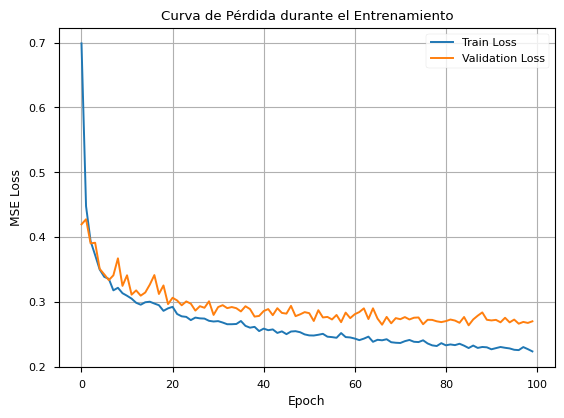

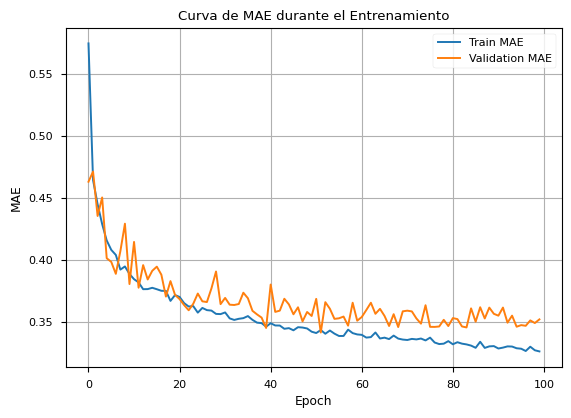

In [134]:
# Graficar la pérdida (MSE) durante el entrenamiento y la validación
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Curva de Pérdida durante el Entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

# Graficar el MAE (Error Absoluto Medio) durante el entrenamiento y la validación
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Curva de MAE durante el Entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

### **Paso 6: Evaluar el modelo en el conjunto de prueba**

In [135]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"MAE en conjunto de prueba: {test_mae:.4f}")


MAE en conjunto de prueba: 0.3400


### **Paso 7: Realizar predicciones con el modelo entrenado**


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


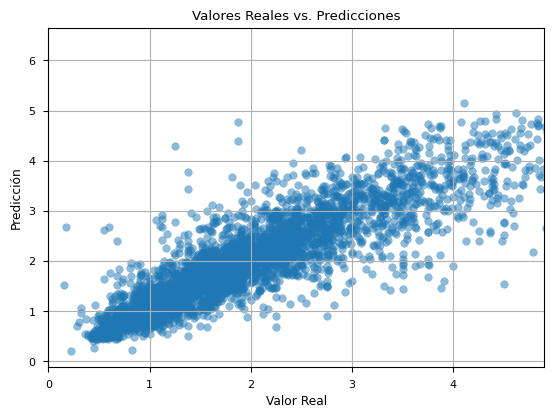

In [137]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Graficar los valores reales vs. las predicciones
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.xlim(0,4.9)
plt.title('Valores Reales vs. Predicciones')
plt.grid(True)
plt.show()


### **Paso 8: Detectar overfitting (sobreajuste)**

Si la pérdida en entrenamiento es significativamente menor que la pérdida en validación, esto podría ser un signo de **overfitting**. En este caso, podríamos:

1. Aumentar el **Dropout**.
2. Reducir la **complejidad del modelo** (menos neuronas o capas).
3. Aumentar la cantidad de **datos** si es posible.
4. Usar **regularización** L2 o early stopping para detener el entrenamiento antes de tiempo.

---

### **Paso 9: Explicación del proceso de regresión**

1. **Regresión vs. Clasificación:** A diferencia de la clasificación, en la regresión el modelo intenta predecir un valor continuo.
2. **Función de pérdida:** Utilizamos el **MSE** (Mean Squared Error) porque penaliza más los errores grandes.
3. **Evaluación:** El MAE (Mean Absolute Error) nos permite medir cuán lejos, en promedio, están las predicciones del valor real.
4. **Escalado de datos:** Es importante escalar los datos para mejorar la convergencia del modelo y evitar que una característica domine a las demás.

---

### **Para recordar...**
El parámetro `verbose` en **Keras** controla el nivel de detalle que se muestra durante el entrenamiento de un modelo. Veamos las diferentes opciones:

### **Valores posibles de `verbose`:**
- **`verbose=0`**: No muestra ninguna salida en la consola. El entrenamiento se ejecuta en silencio.
- **`verbose=1`**: Muestra una barra de progreso para cada época junto con la métrica seleccionada (por ejemplo, `loss`, `mae`, `accuracy`, etc.).
- **`verbose=2`**: Muestra un resumen en texto de cada época, sin la barra de progreso.

---
Aunque el optimizador Adam (Adaptive Moment Estimation) tiene la ventaja de ajustar automáticamente las tasas de aprendizaje a lo largo del entrenamiento, aún es útil definir una tasa de aprendizaje inicial para controlar el comportamiento del modelo, especialmente al inicio del entrenamiento.

---

### **Conclusión**

Diseñamos y entrenamos una **red neuronal para regresión** usando el dataset de **California Housing** con **Keras**. Exploramos cada paso del proceso: desde la carga de datos y preprocesamiento, hasta la definición de la arquitectura del modelo y evaluación del rendimiento en el conjunto de prueba. También discutimos cómo identificar y mitigar el **overfitting** para garantizar un modelo más robusto.

Este ejemplo demuestra cómo las **redes neuronales** se pueden aplicar no solo a tareas de clasificación, sino también a problemas de **regresión**, donde se busca predecir valores continuos como el precio de las viviendas.